# HW2
```
author: zeyuanp2
```

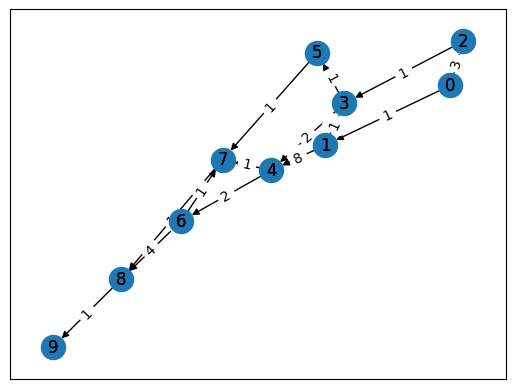

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import *
from gurobipy import *

gp=pd.read_csv("./gp1.csv",header=None)
gpp=np.matrix(gp)
gpp

net = nx.from_numpy_matrix(gpp, create_using=nx.DiGraph())

pos2=nx.spring_layout(net) 
nx.draw_networkx(net,pos2)
nx.draw_networkx_labels(net,pos2)
labels=nx.get_edge_attributes(net,"weight")
nx.draw_networkx_edge_labels(net,pos2,edge_labels=labels)

plt.show()

In [4]:
# storing the *original costs* of the network so that we can use them later.
# This way we may only "read" the network once.

def actual_cost(path, original_costs):
    my_cost=0
    for i in range(len(path)-1):
        my_cost+=original_costs[path[i],path[i+1]]
    return my_cost

def short_path(nett):

    original_costs={}
    for (i,j,d) in nett.edges(data=True):
        original_costs[i,j]=d['weight']
    tau=1
    alpha=0.9
    lamb=0
    prevlamb=100
    iteration=1

    start=0
    end=9

    numArcs=10

#print(original_costs)
    done=False
    while(not done):

        # print(lamb)
        for (i,j,d) in nett.edges(data=True):
            d['weight']=original_costs[i,j]+lamb
        
        #****
        SP=nx.dijkstra_path(nett, start, end, weight='weight')
        #****
        
        lagrangian_cost=nx.dijkstra_path_length(nett, start, end, weight='weight')-lamb*numArcs
        actualPath=nx.dijkstra_path(nett, start, end, weight='weight')
        true_cost=actual_cost(actualPath, original_costs)
        
        prevLamb=lamb
        
        
        #******
        derr=(len(SP)-1)-numArcs
        lamb+=derr*pow(alpha,iteration)
        #******
        
        flag=0
        if lamb<0:
            lamb=0
        iteration+=1
        for i in SP:
            if i in red_light:
                flag+=1
        # derr<=0 means that we satisfy the side constraint; true_cost==langrangian_cost means we have the same primal and dual solutions
        if derr<=0 and true_cost==lagrangian_cost: 
            done=True

    return lagrangian_cost,SP

beta=2
red_light=[3,7]

if beta==0:
    nett=net.copy()
    for i in red_light:
        nett.remove_node(i)
    lagrangian_cost,SP=short_path(nett)
    print(SP,lagrangian_cost)
elif beta==1:
    path_cost=[]
    path=[]
    for i in red_light:
        nett1=net.copy()
        nett1.remove_node(i)
        # print(nett1.nodes())
        lagrangian_cost,SP=short_path(nett1)
        path_cost.append(lagrangian_cost)
        path.append(SP)
    print(path[path_cost.index(min(path_cost))],min(path_cost))
    # print(path)
else:
    lagrangian_cost,SP=short_path(net)
    print(SP,lagrangian_cost)



[0, 1, 3, 5, 7, 8, 9] 6
